In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import numpy as np
from scipy.stats import rankdata

In [2]:
impute_baseline = pd.read_csv('../main/log/missing_values_baseline.csv', names=["algo", "experiment_id", "perc_missing", "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness","elite_size", "log"])

In [3]:
baseline = pd.read_csv('../main/log/tie_new.csv', names=["algo", "experiment_id","only_inflate",   "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness","elite_size","elite_blocks",
                                        "tie_inflate", "diff_sn_inflate", "size_sn_inflate",
                                       "tie_deflate", "diff_sn_deflate", "size_sn_deflate",
                                        "tie_mb_deflate", "diff_sn_mb_deflate", "size_sn_mb_deflate"])

In [4]:
median = pd.read_csv('../main/log/missing_values_median.csv', names=["algo", "experiment_id", "perc_missing", "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness","elite_size", "log"])

In [5]:
data = pd.read_csv('../main/log/missing_values.csv', names=["algo", "experiment_id", "perc_missing", "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness","elite_size", "log"])
data = data.drop(data.query("dataset == '0.1'").index)

C:\Users\dfarinati\AppData\Local\Temp\ipykernel_9764\2708804284.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../main/log/missing_values.csv', names=["algo", "experiment_id", "perc_missing", "dataset", "seed", "generation",


In [6]:
data.head()

,algo,experiment_id,perc_missing,dataset,seed,generation,training_fitness,timing,pop_node_count,test_fitness,elite_size,log
159,SLIM*1SIG,665cce50-44f0-11ef-954f-049226d8b1cb,0.1,yatch,0,0,15.771647,0.098021,1490.0,14.762535,7,1
160,SLIM*1SIG,665cce50-44f0-11ef-954f-049226d8b1cb,0.1,yatch,0,1,15.714593,0.096022,2066.0,14.823864,15,1
161,SLIM*1SIG,665cce50-44f0-11ef-954f-049226d8b1cb,0.1,yatch,0,2,15.663667,0.045010,1586.0,14.665213,11,1
162,SLIM*1SIG,665cce50-44f0-11ef-954f-049226d8b1cb,0.1,yatch,0,3,15.589137,0.075019,1762.0,14.493318,17,1
163,SLIM*1SIG,665cce50-44f0-11ef-954f-049226d8b1cb,0.1,yatch,0,4,15.553480,0.044011,1418.0,14.445681,15,1


In [7]:
data.dataset.unique()

array(['yatch', 'airfoil', 'concrete_slump', 'concrete_strength', 'ppb',
       'bioav', 'ld50'], dtype=object)

In [9]:
# data['output_scale'] = data.dataset.apply(lambda x: x.split('_')[-1])
# data['input_scale'] = data.dataset.apply(lambda x: x.split('_')[-2])
# data['dataset'] = data.dataset.apply(lambda x: x.split('_')[0])
data['algo'] = data['algo'] + '_' + data['perc_missing'].astype(str)

In [10]:
data.head()

,algo,experiment_id,perc_missing,dataset,seed,generation,training_fitness,timing,pop_node_count,test_fitness,elite_size,log
159,SLIM*1SIG_0.1,665cce50-44f0-11ef-954f-049226d8b1cb,0.1,yatch,0,0,15.771647,0.098021,1490.0,14.762535,7,1
160,SLIM*1SIG_0.1,665cce50-44f0-11ef-954f-049226d8b1cb,0.1,yatch,0,1,15.714593,0.096022,2066.0,14.823864,15,1
161,SLIM*1SIG_0.1,665cce50-44f0-11ef-954f-049226d8b1cb,0.1,yatch,0,2,15.663667,0.045010,1586.0,14.665213,11,1
162,SLIM*1SIG_0.1,665cce50-44f0-11ef-954f-049226d8b1cb,0.1,yatch,0,3,15.589137,0.075019,1762.0,14.493318,17,1
163,SLIM*1SIG_0.1,665cce50-44f0-11ef-954f-049226d8b1cb,0.1,yatch,0,4,15.553480,0.044011,1418.0,14.445681,15,1


In [11]:
algorithms = ['SLIM*1SIG', 'SLIM*1NORM', 'SLIM+2SIG']

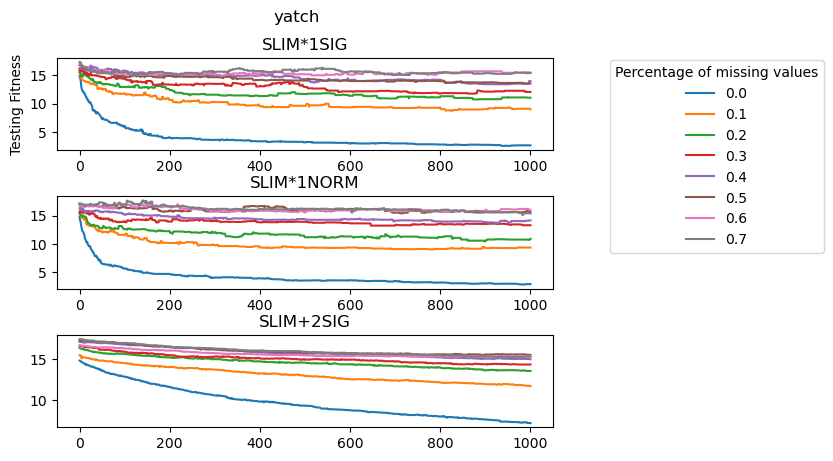

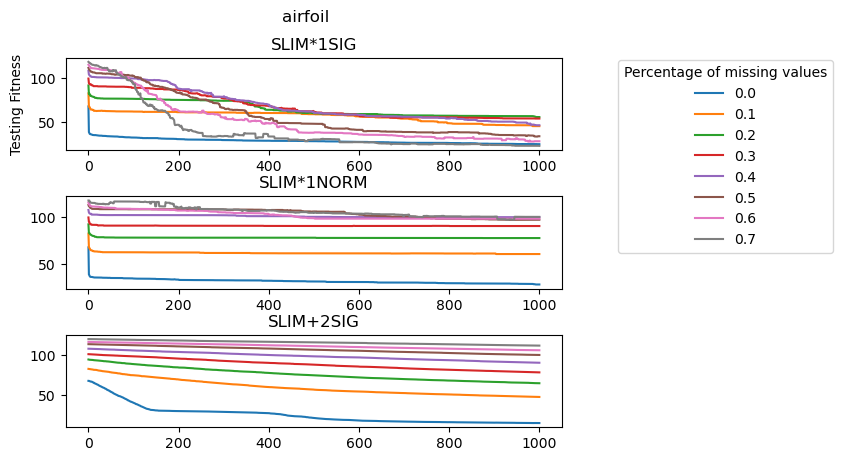

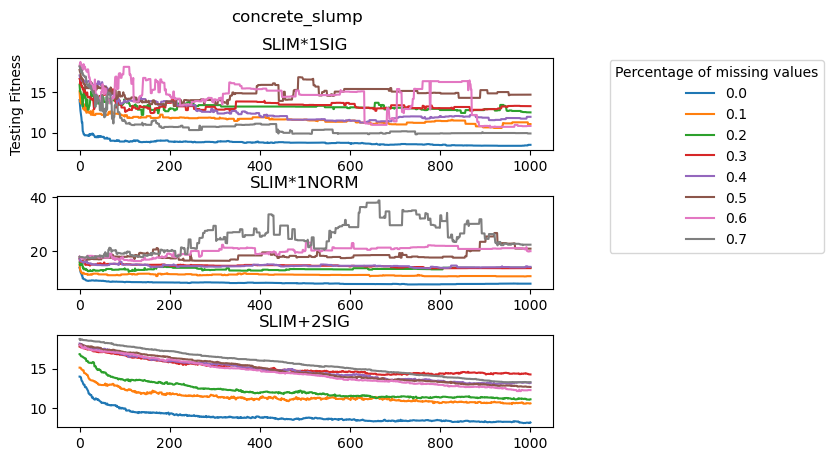

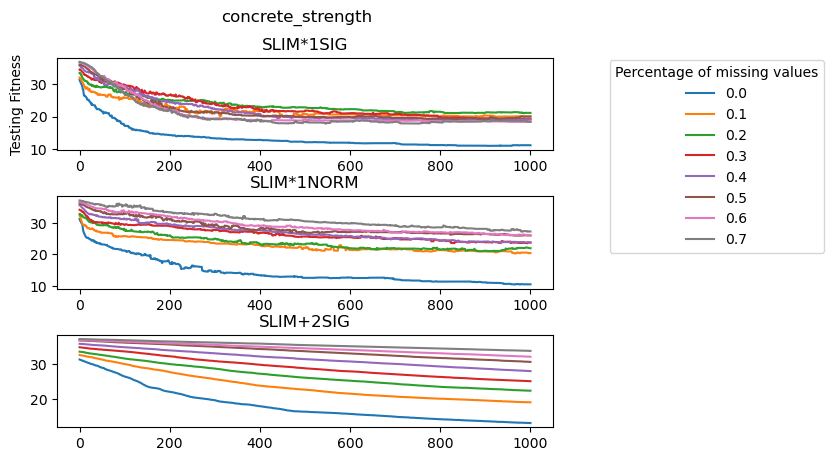

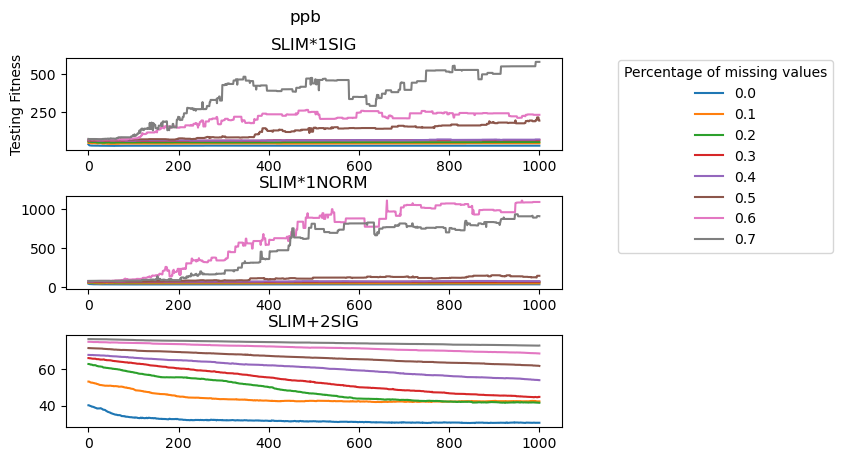

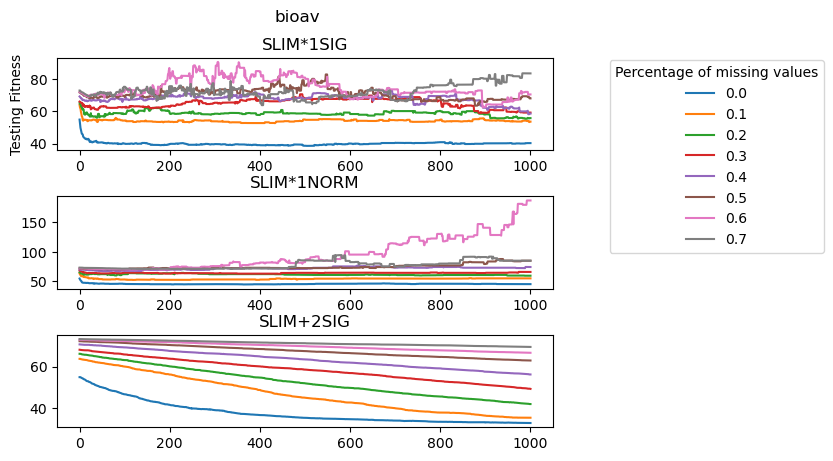

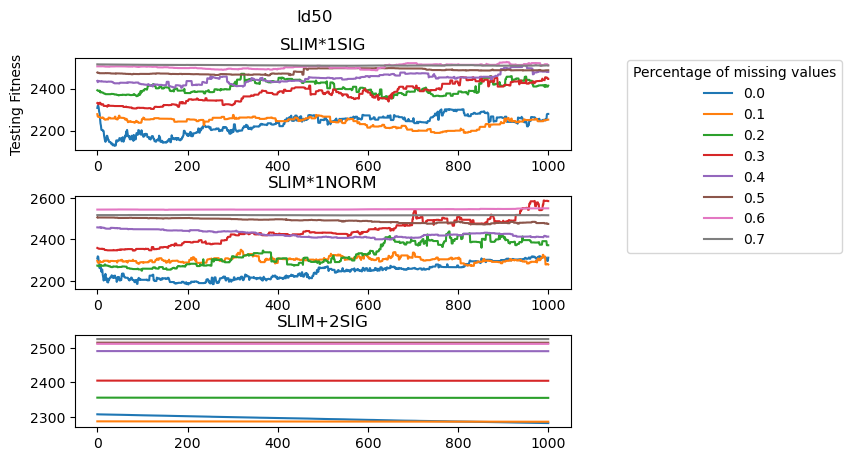

In [46]:
data['algo'] = data['algo'] + '_' + data['perc_missing'].astype(str)
for dataset in data['dataset'].unique():
    
    grouped = data.query("dataset == @dataset") \
    [['generation', 'training_fitness', 'test_fitness', 'elite_size', 'algo']].groupby(['generation', 'algo']).median()

    baseline_grouped = baseline.query("dataset == @dataset") \
    [['generation', 'training_fitness', 'test_fitness', 'elite_size', 'algo']].groupby(['generation', 'algo']).median()
    
    if not grouped.values.shape[0] == 0:
    
        grouped.reset_index(inplace = True)
        baseline_grouped.reset_index(inplace = True)

        gs = gridspec.GridSpec(3, 1)
        gs.update( wspace=0.6, hspace =  0.5)
        pl.figure()

        plt.suptitle(dataset )

        
        ax1 = pl.subplot(gs[0, 0]) 
        pl.plot(range(max(baseline_grouped.generation+1)), baseline_grouped.query("algo == @algorithms[0]")['test_fitness'], label = '0.0')
        for algo_ in list(filter(lambda x: algorithms[0] in x, grouped.algo.unique())):
            ax1 = pl.subplot(gs[0, 0]) 
            pl.plot(range(max(grouped.generation+1)), grouped.query("algo == @algo_")['test_fitness'], label = algo_.split('_')[-1])
            ax1.set_ylabel('Testing Fitness')
            ax1.set_title(algorithms[0])
            ax1.legend(bbox_to_anchor=(1.1, 1.05), title = 'Percentage of missing values')

        ax2 = pl.subplot(gs[1, 0])
        pl.plot(range(max(baseline_grouped.generation+1)), baseline_grouped.query("algo == @algorithms[1]")['test_fitness'], label = '0.0')
        for algo_ in list(filter(lambda x: algorithms[1] in x, grouped.algo.unique())):
            ax2 = pl.subplot(gs[1, 0]) 
            pl.plot(range(max(grouped.generation+1)), grouped.query("algo == @algo_")['test_fitness'], label = algo_.split('_')[-1])
#                     ax2.set_ylabel('Testing Fitness')
            ax2.set_title(algorithms[1])
            
        ax2 = pl.subplot(gs[2, 0])
        pl.plot(range(max(baseline_grouped.generation+1)), baseline_grouped.query("algo == @algorithms[2]")['test_fitness'], label = '0.0')
        for algo_ in list(filter(lambda x: algorithms[2] in x, grouped.algo.unique())):
            ax3 = pl.subplot(gs[2, 0]) 
            pl.plot(range(max(grouped.generation+1)), grouped.query("algo == @algo_")['test_fitness'], label = algo_.split('_')[-1])
#                     ax3.set_ylabel('Testing Fitness')
            ax3.set_title(algorithms[2])
            

        plt.show()

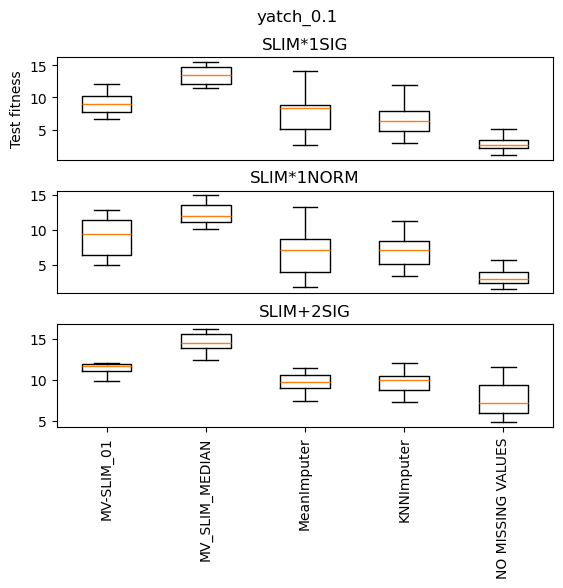

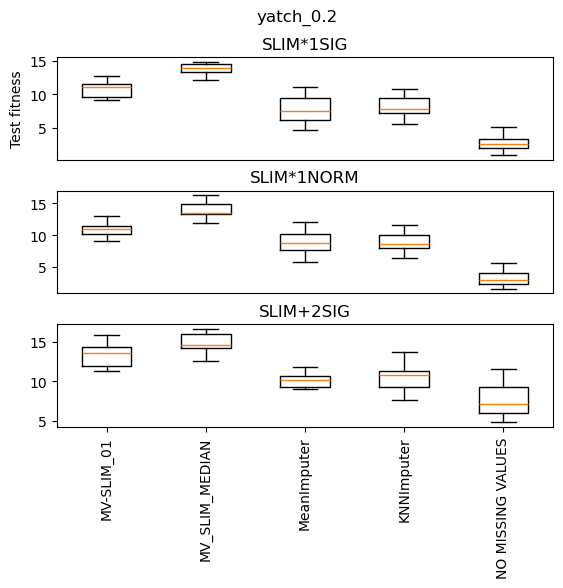

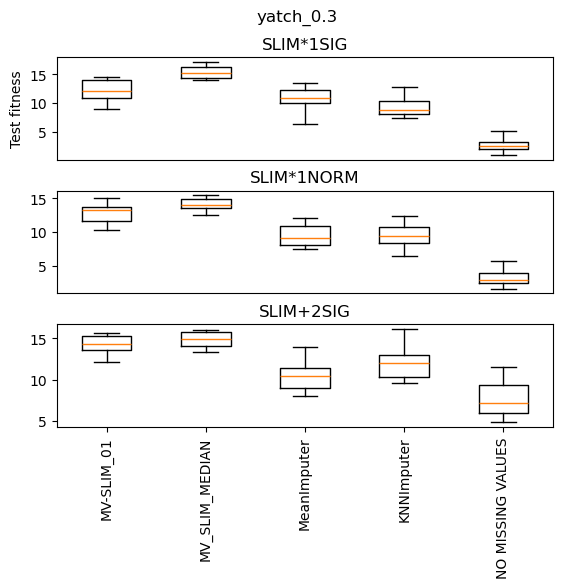

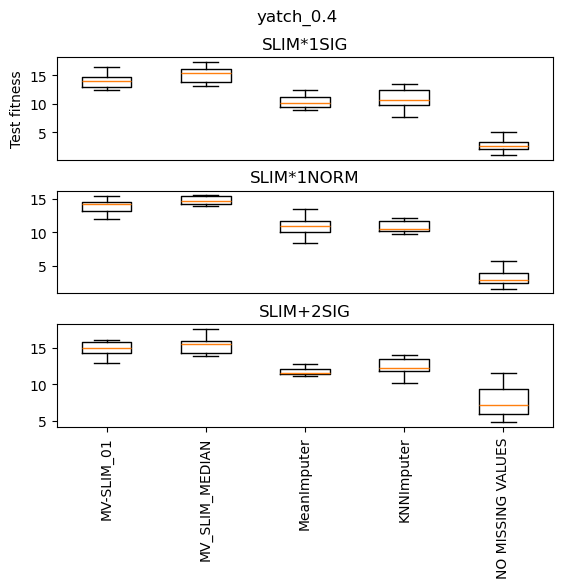

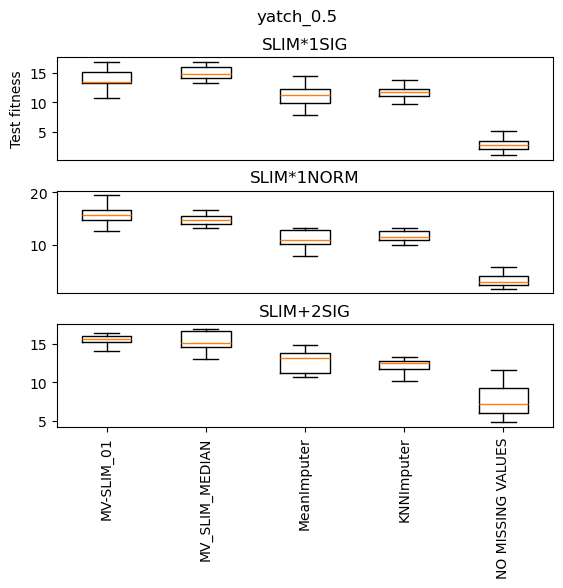

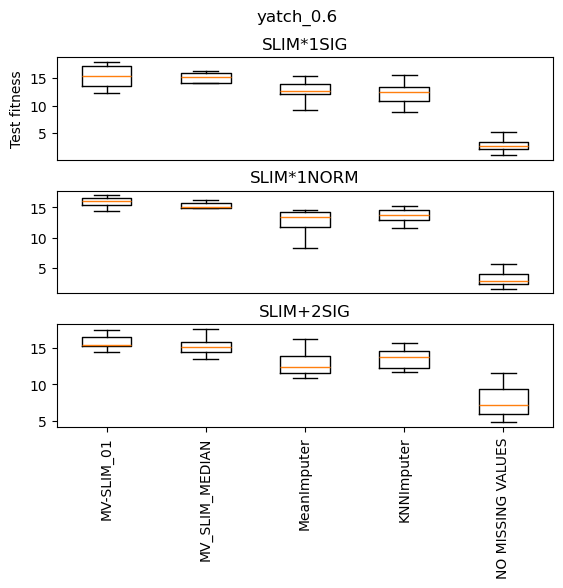

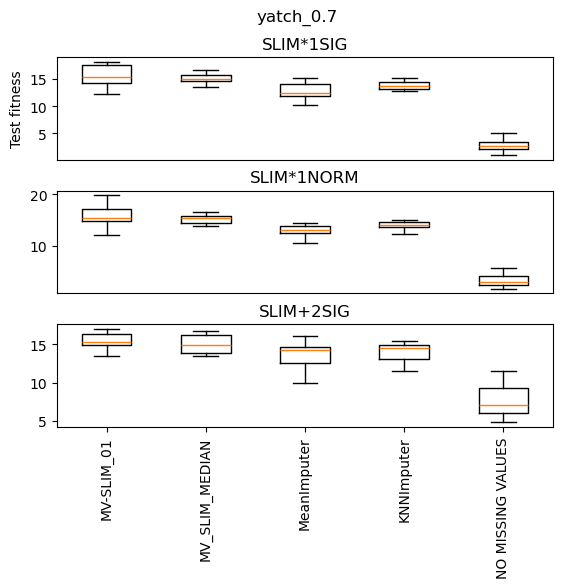

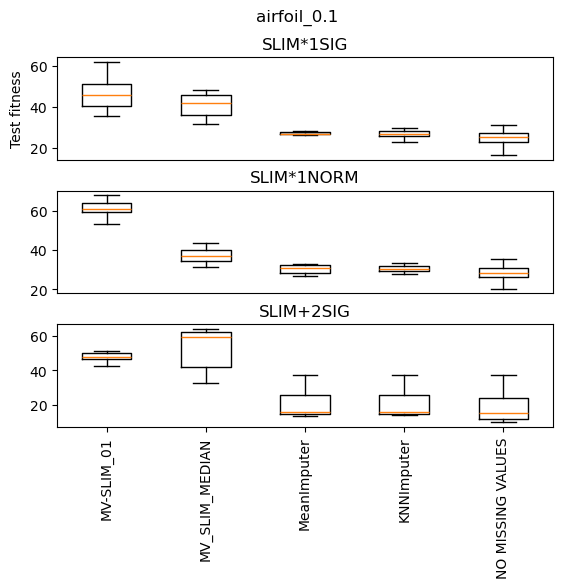

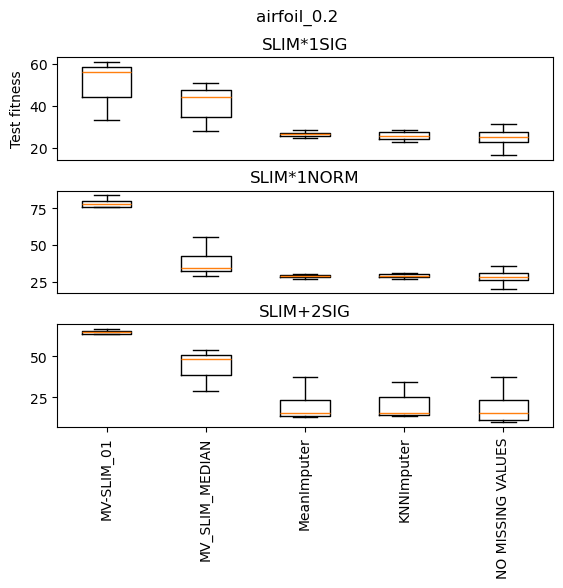

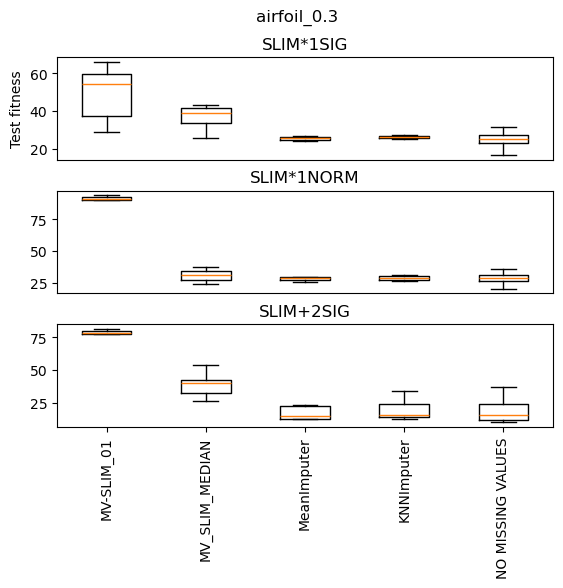

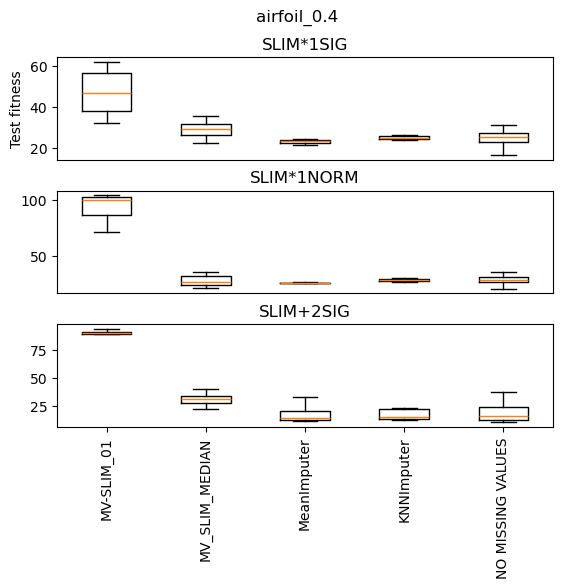

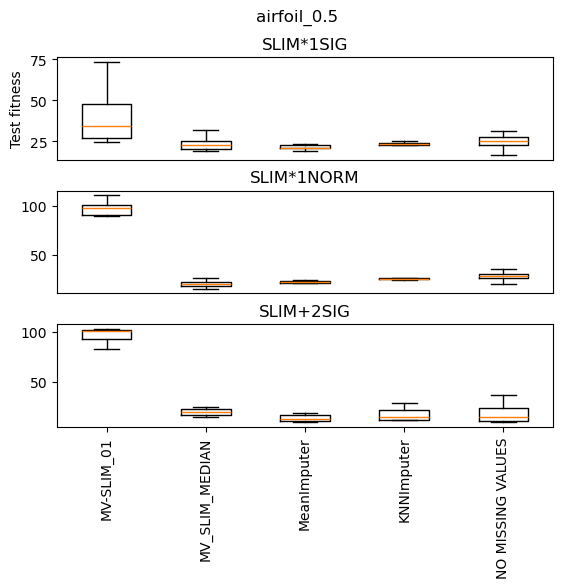

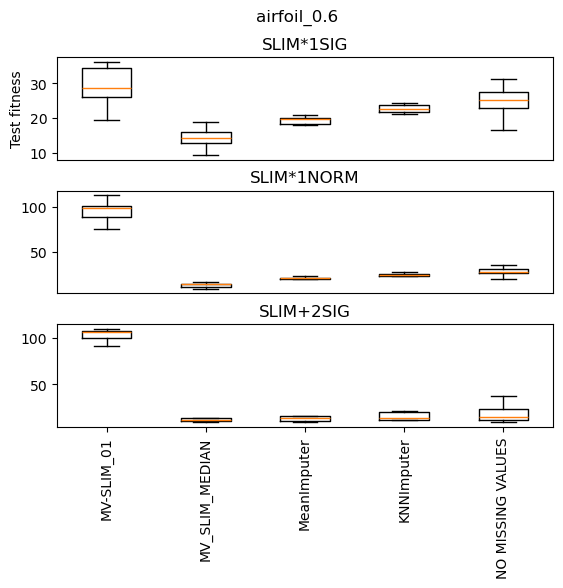

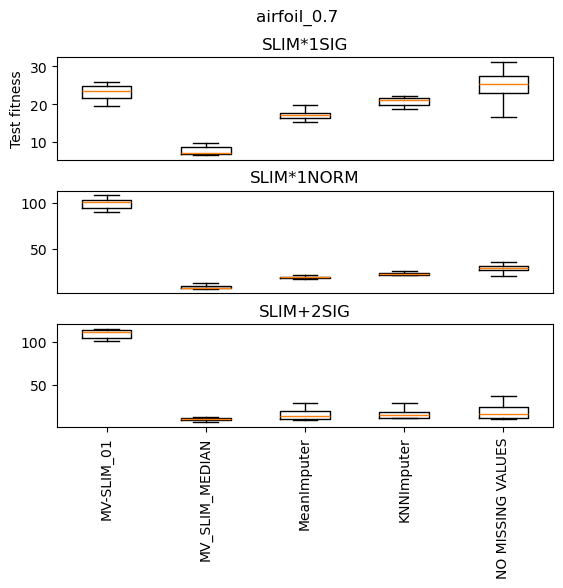

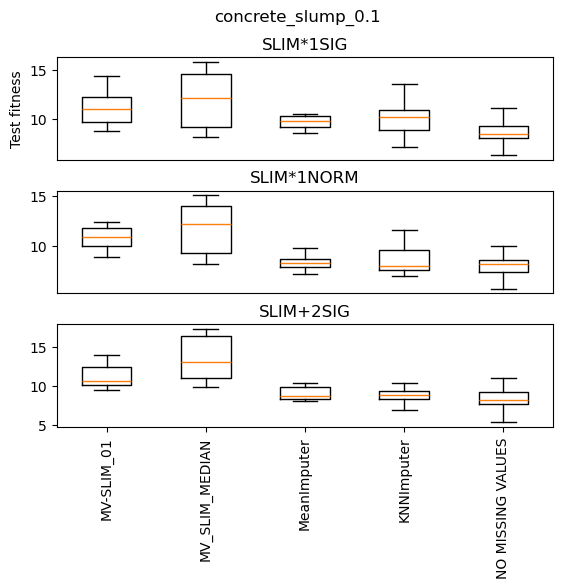

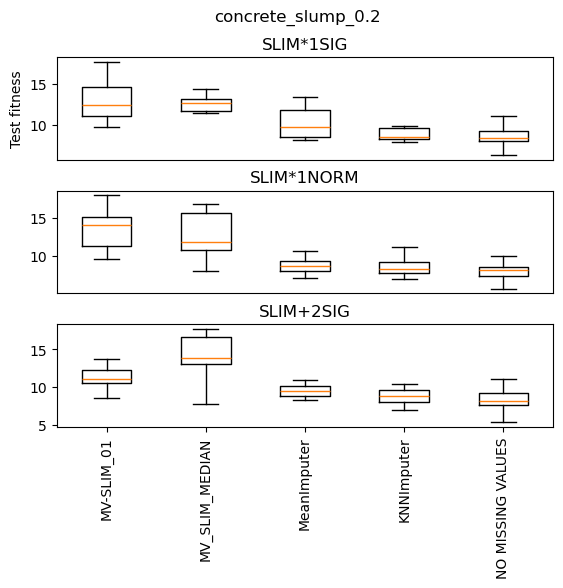

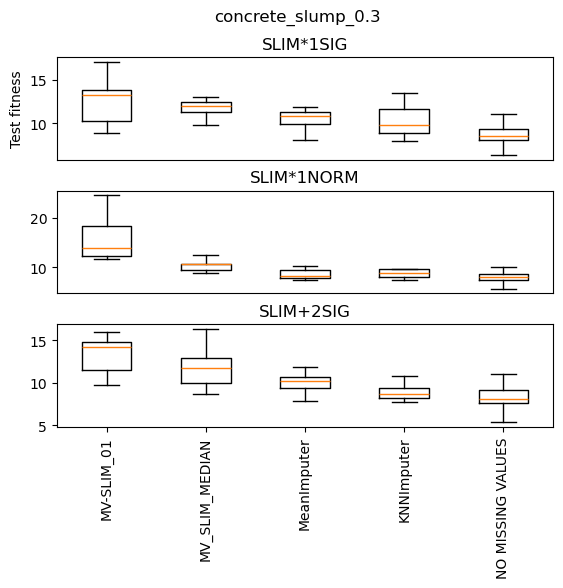

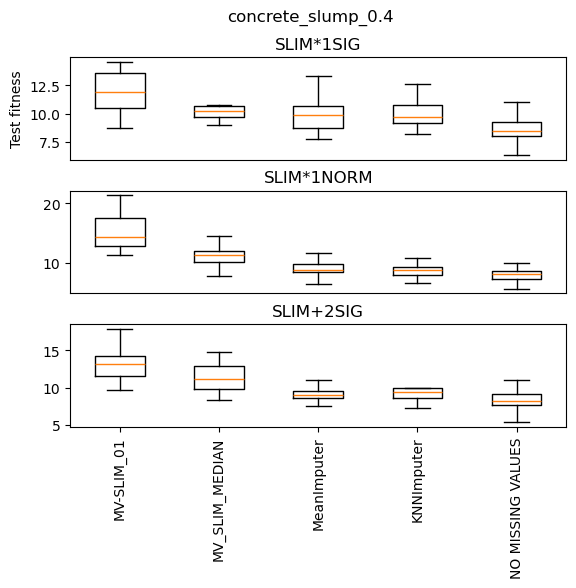

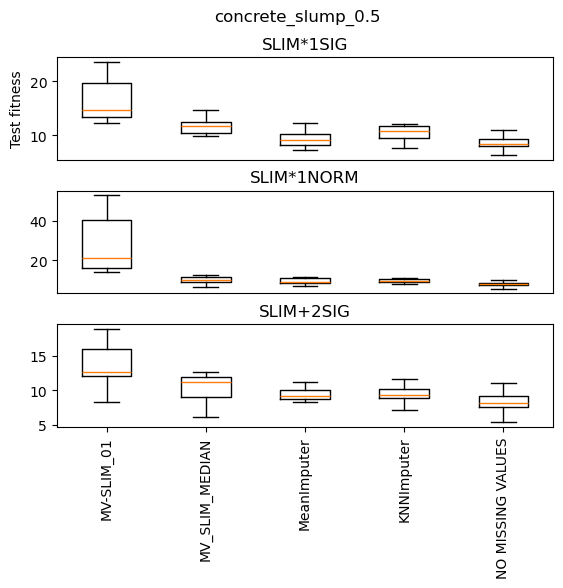

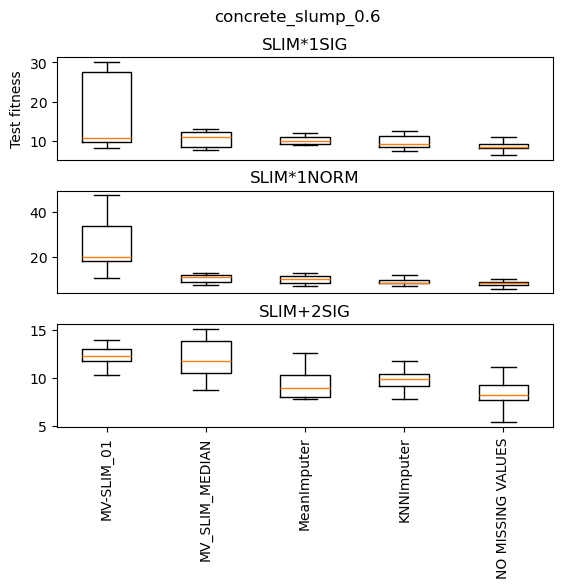

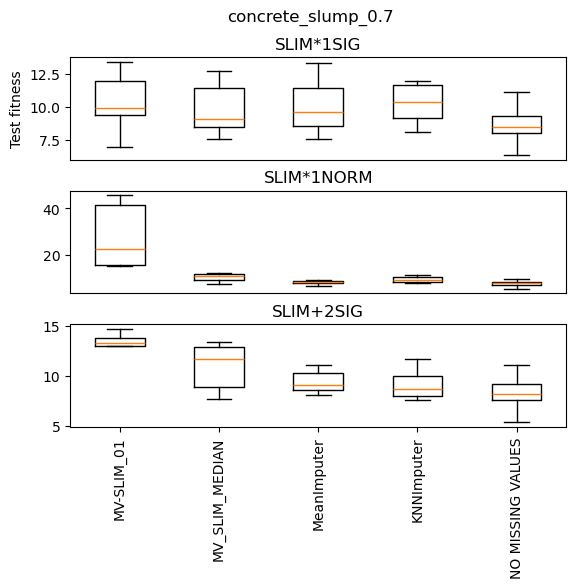

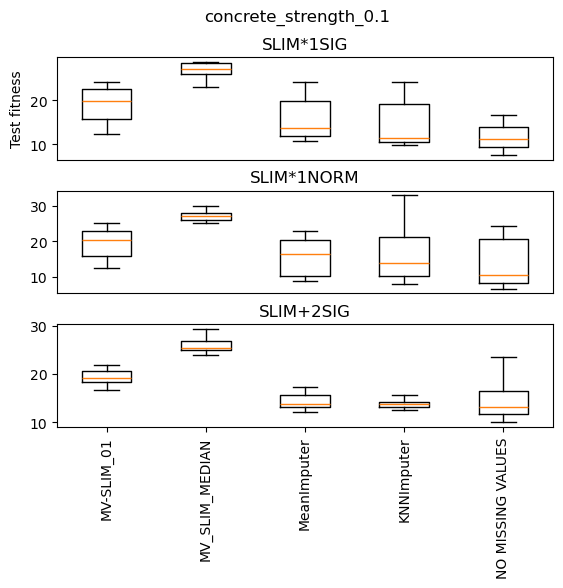

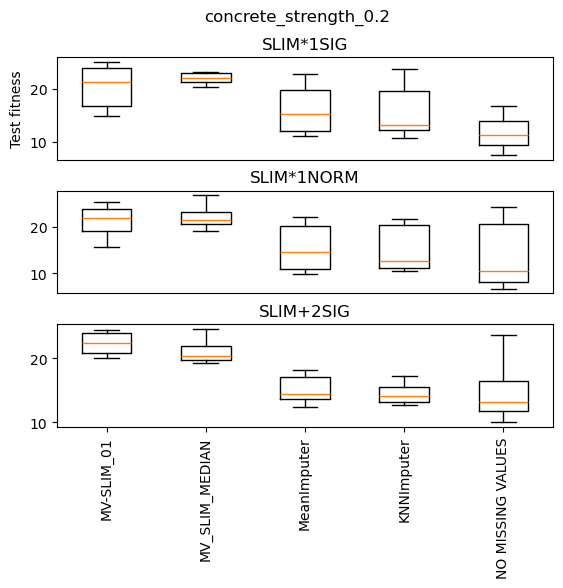

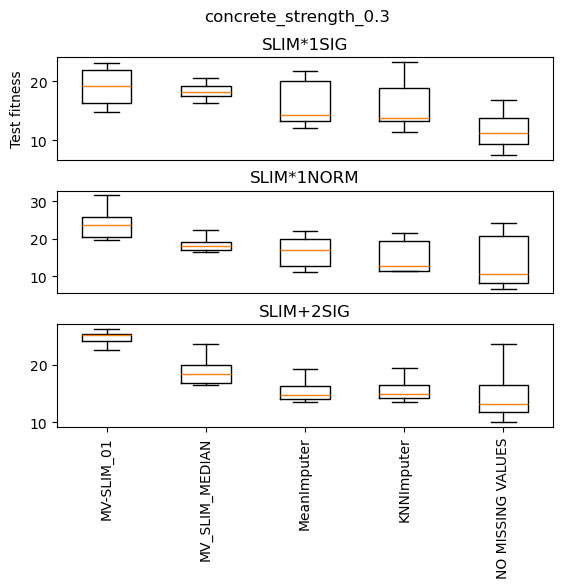

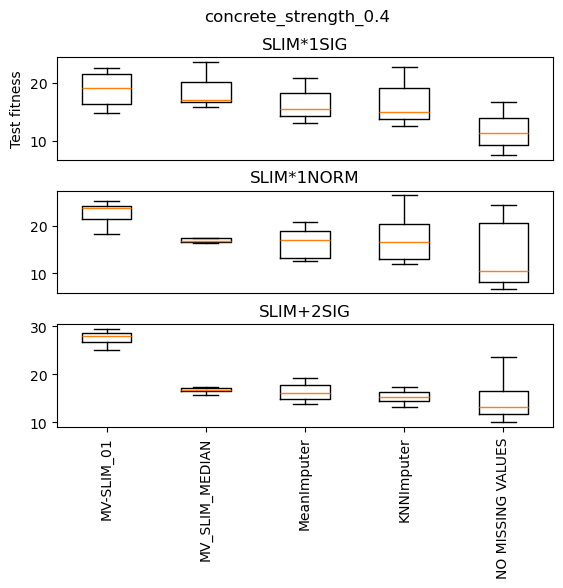

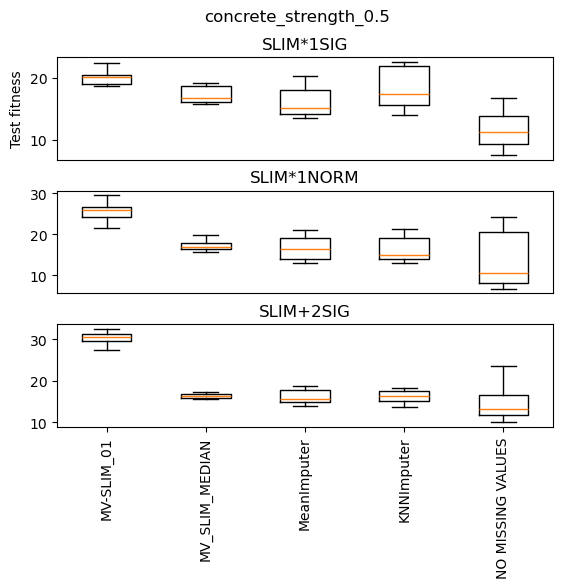

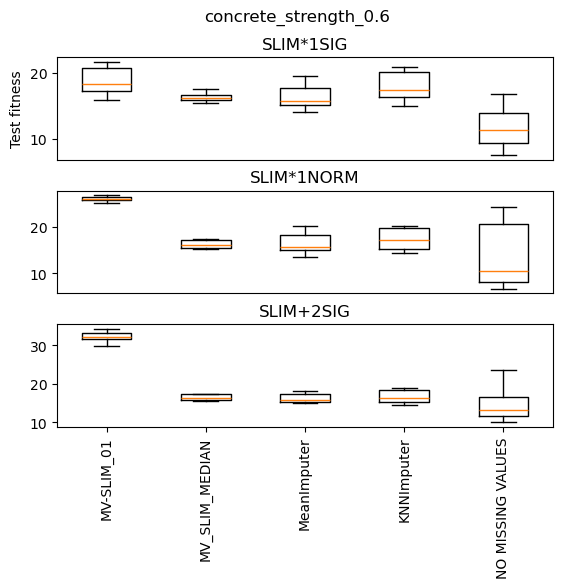

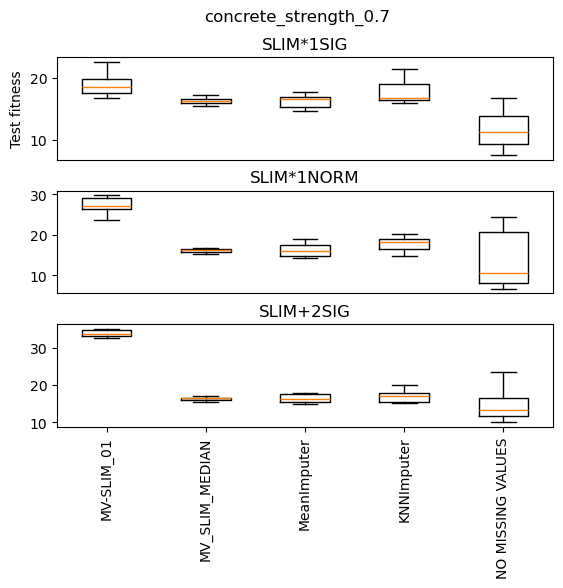

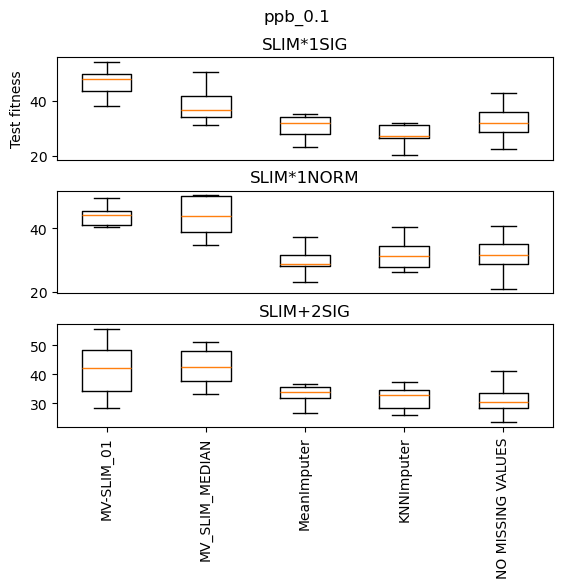

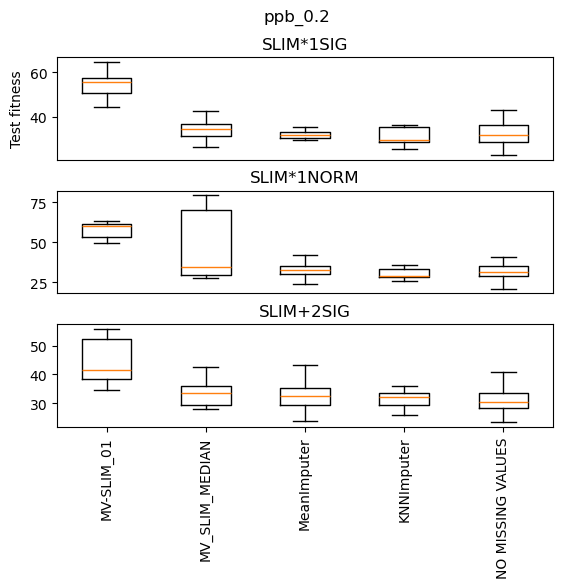

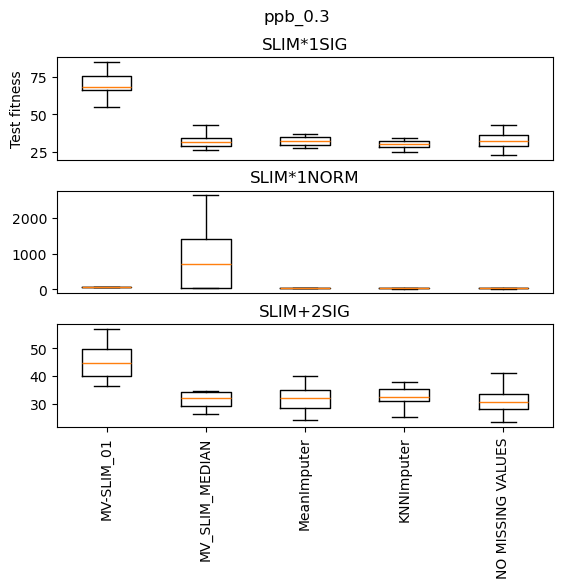

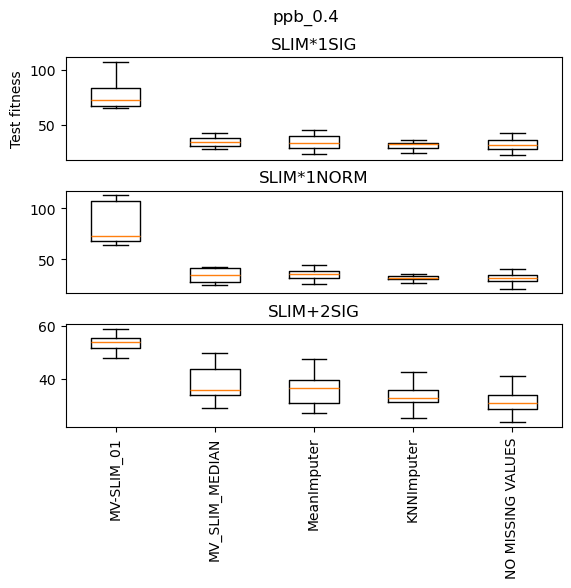

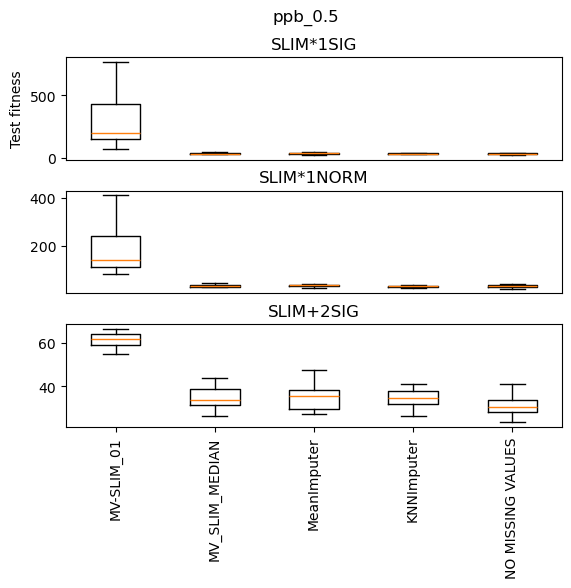

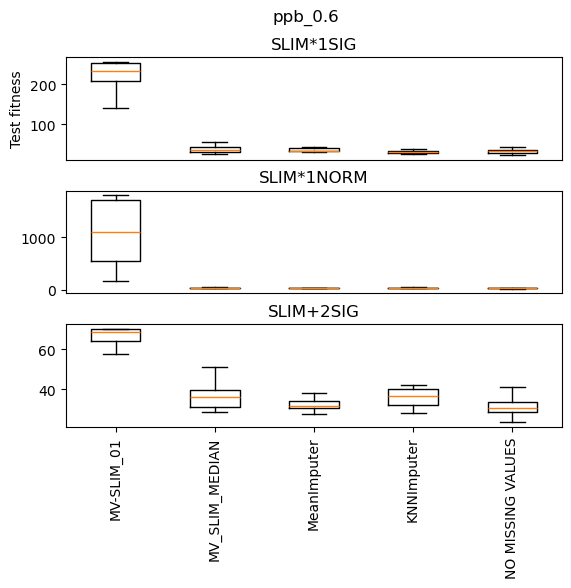

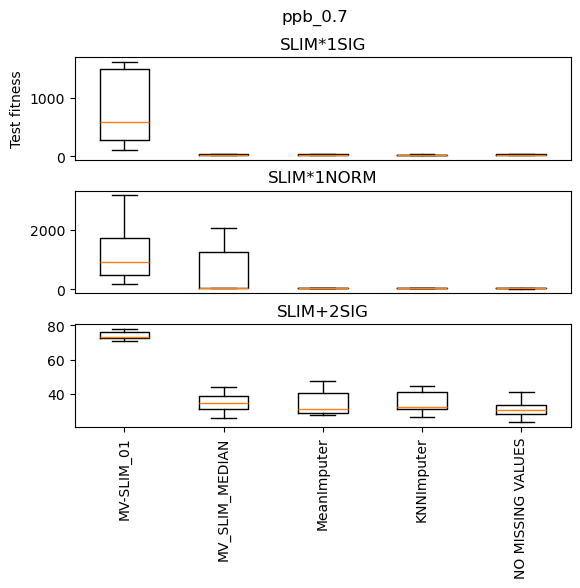

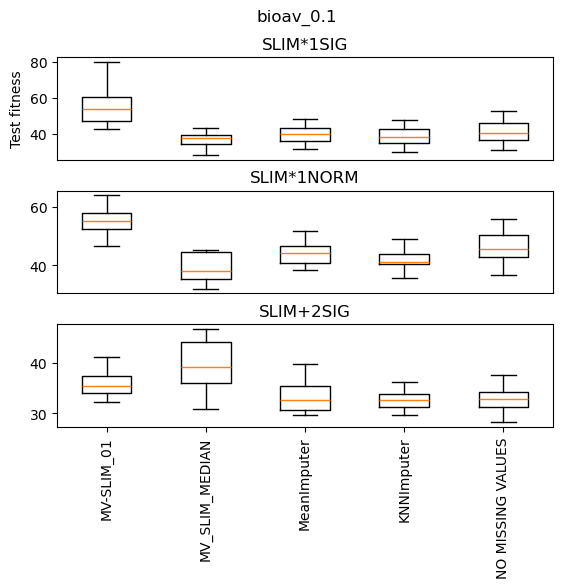

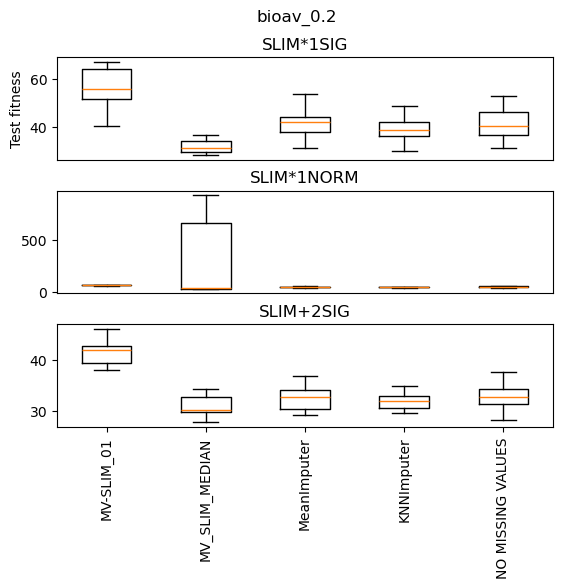

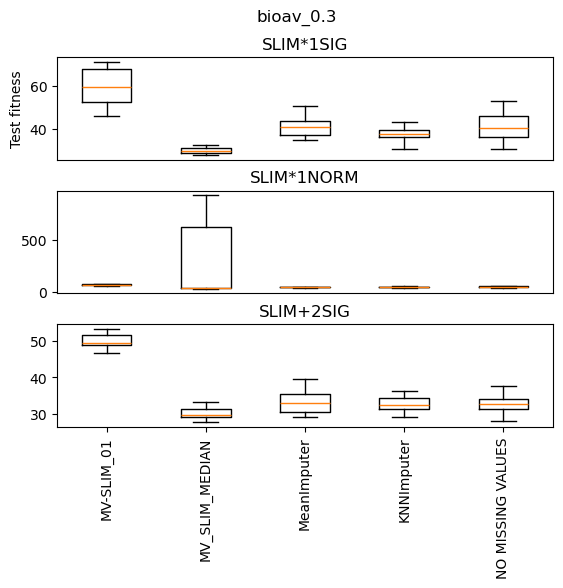

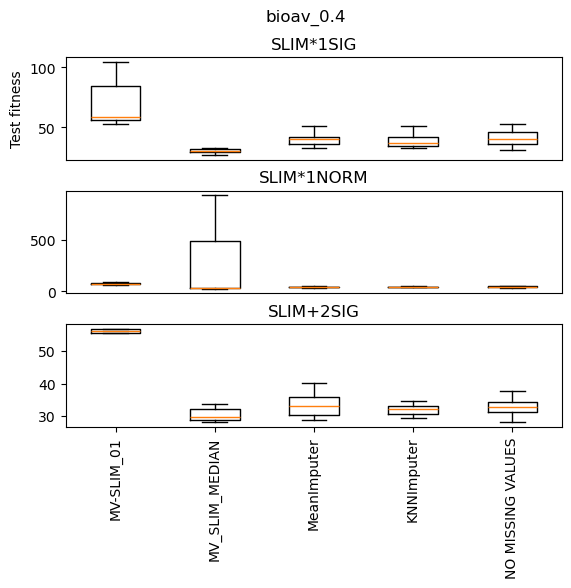

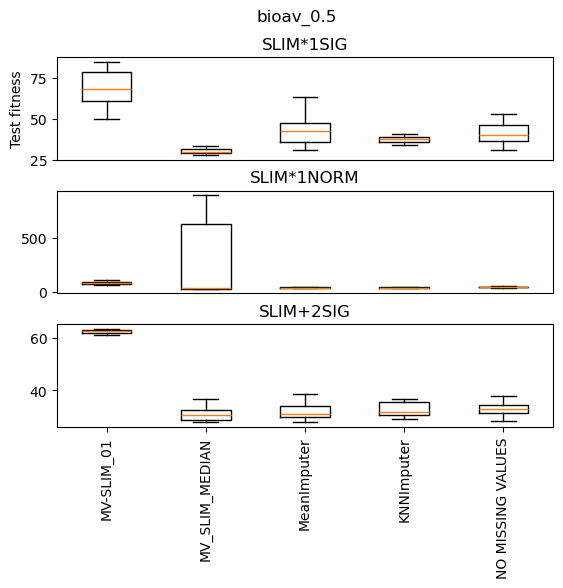

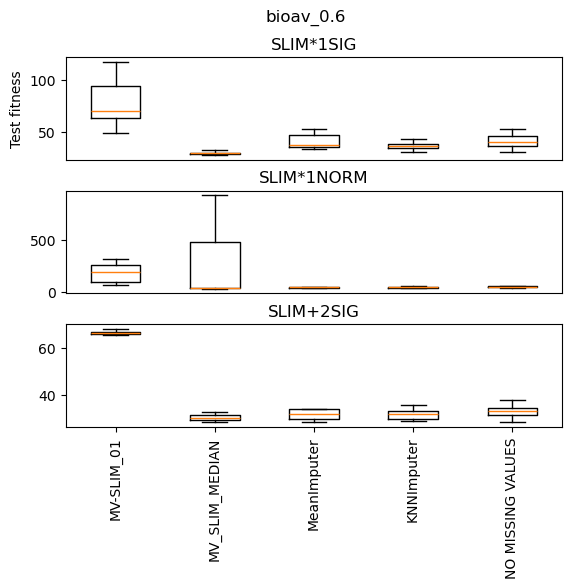

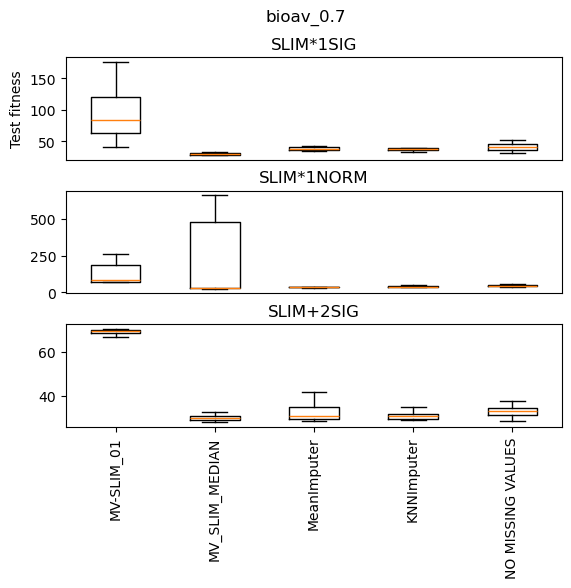

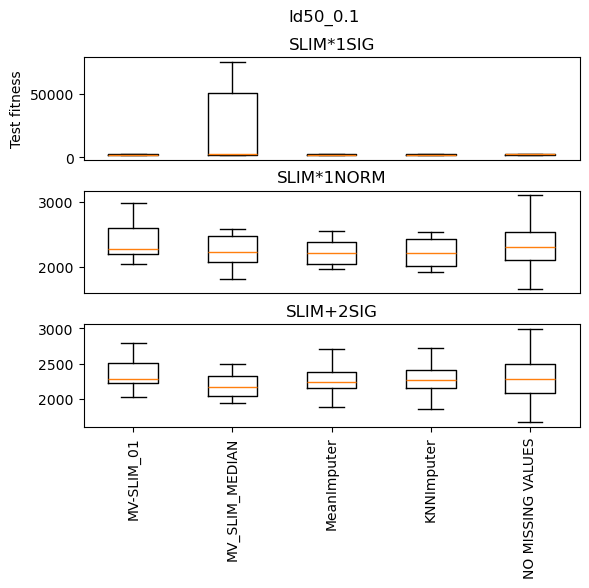

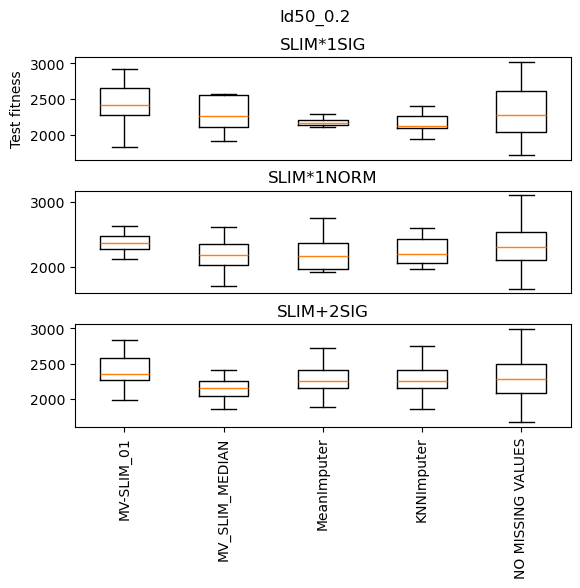

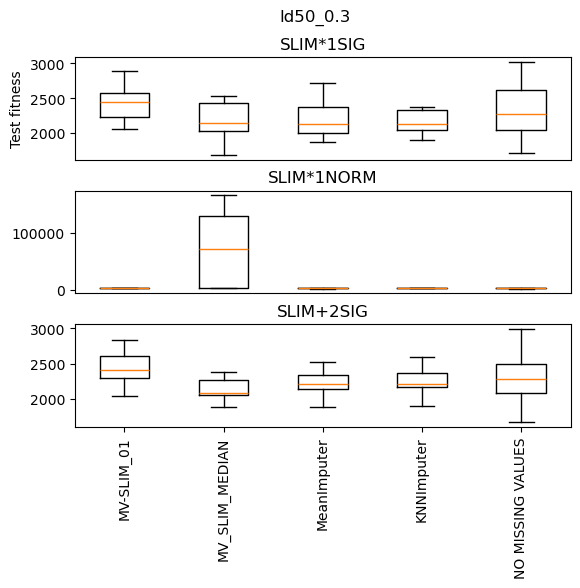

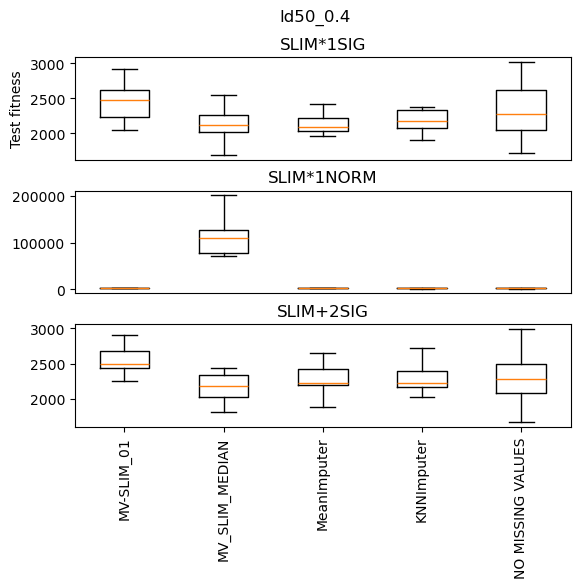

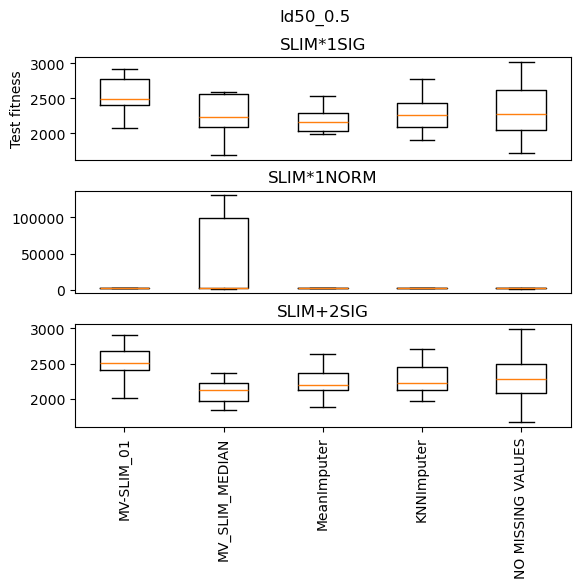

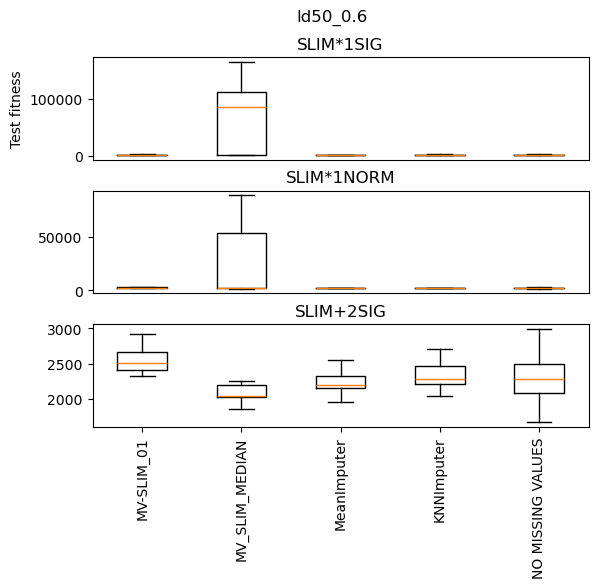

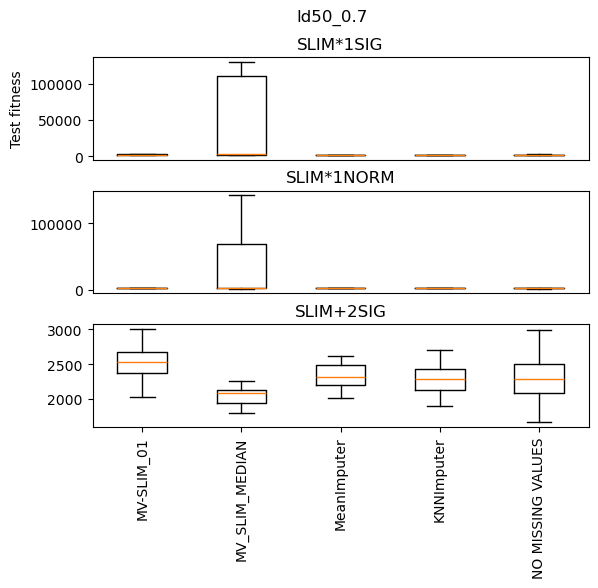

In [9]:
data.perc_missing = data.perc_missing.astype(float)
data['algo'] = data['algo'].apply(lambda x: x.split('_')[0])

for dataset in data['dataset'].unique():
    for m_v in data['perc_missing'].unique():

        gs = gridspec.GridSpec(3, 1)
        gs.update( wspace=0, hspace =  0.3)
        pl.figure()
    
        plt.suptitle(dataset + '_' + str(m_v) )

        for i, algorithm in enumerate(data['algo'].unique()):

            methods = [algorithm + '_MeanImputer', algorithm + '_KNNImputer']

            ax = pl.subplot(gs[i, 0]) 
            
            performance = [data.query("dataset == @dataset and perc_missing == @m_v and generation == 1000 and algo == @algorithm")['test_fitness'].values]

            performance.append(  median.query("dataset == @dataset and perc_missing == @m_v and generation == 1000 and algo == @algorithm")['test_fitness'].values)
            
            performance.extend([impute_baseline.query 
               ("dataset == @dataset and perc_missing == @m_v and generation == 1000 and algo == @algorithm_")['test_fitness'].values
                        for algorithm_ in methods ])

            performance.append(  baseline.query("dataset == @dataset and generation == 1000 and algo == @algorithm")['test_fitness'].values)

            
            pl.boxplot(performance, labels = ['MV-SLIM_01', 'MV_SLIM_MEDIAN', 'MeanImputer', 'KNNImputer', 'NO MISSING VALUES'] if i == 2 else None,
                      showfliers = False)
            if i != 2:
                plt.tick_params(
                    axis='x',          # changes apply to the x-axis
                    which='both',      # both major and minor ticks are affected
                    bottom=False,      # ticks along the bottom edge are off
                    top=False,         # ticks along the top edge are off
                    labelbottom=False) 
            plt.xticks(rotation=90)
            
            ax.set_title(algorithm) 
            if i == 0:
                ax.set_ylabel('Test fitness')
                
        plt.show()